In [1]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
from nearest_neighbors import KNNClassifier
from cross_validation import *
from sklearn.metrics import confusion_matrix
%matplotlib inline

In [291]:
X_train = pd.read_csv('./mnist_train.csv')
y_train = X_train.pop('answer')
X_test = pd.read_csv('./mnist_test.csv')
y_test = X_test.pop('answer')
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(60000, 784) (60000,) (10000, 784) (10000,)


### Execution time

In [4]:
idx_subsets = [(np.random.randint(X_train.shape[1], size=x), x) for x in [10, 20, 100]]
k = 5
metric = 'euclidean'
weights = False
test_block_size = 10000
strategy_list = ['my_own', 'brute', 'kd_tree', 'ball_tree']

In [5]:
for strategy in strategy_list:
    for subset, number in idx_subsets:
        clf = KNNClassifier(k, strategy, metric, weights, test_block_size)
        start_time = time.time()
        clf.fit(X_train.iloc[:, subset].values, y_train.values)
        clf.find_kneighbors(X_test.iloc[:, subset].values, False)
        print(f'strategy: {strategy} | subset size: {number} | time: {time.time() - start_time}')

strategy: my_own | subset size: 10 | time: 100.73077726364136
strategy: my_own | subset size: 20 | time: 103.11806440353394
strategy: my_own | subset size: 100 | time: 141.00851678848267
strategy: brute | subset size: 10 | time: 10.94530463218689
strategy: brute | subset size: 20 | time: 10.707028150558472
strategy: brute | subset size: 100 | time: 12.261107921600342
strategy: kd_tree | subset size: 10 | time: 2.579348564147949
strategy: kd_tree | subset size: 20 | time: 4.295413494110107
strategy: kd_tree | subset size: 100 | time: 86.93846130371094
strategy: ball_tree | subset size: 10 | time: 3.2485053539276123
strategy: ball_tree | subset size: 20 | time: 9.749547004699707
strategy: ball_tree | subset size: 100 | time: 76.1410984992981


In [8]:
k = X_train.shape[0]
strategy_list = ['my_own', 'brute']

In [9]:
for strategy in strategy_list:
    for subset, number in idx_subsets:
        clf = KNNClassifier(k, strategy, metric, weights, test_block_size)
        start_time = time.time()
        clf.fit(X_train.iloc[:, subset].values, y_train.values)
        clf.find_kneighbors(X_test.iloc[:, subset].values, False)
        print(f'strategy: {strategy} | subset size: {number} | time: {time.time() - start_time}')

strategy: my_own | subset size: 10 | time: 99.51858305931091
strategy: my_own | subset size: 20 | time: 103.2930109500885
strategy: my_own | subset size: 100 | time: 136.18395614624023
strategy: brute | subset size: 10 | time: 57.11698889732361
strategy: brute | subset size: 20 | time: 57.15402960777283
strategy: brute | subset size: 100 | time: 59.10980224609375


### Cross-Validation

In [28]:
folds = kfold(X_train.shape[0], 3)
metrics = ['euclidean', 'cosine']

In [29]:
params = {
    'strategy' : 'brute',
    'metric' : '',
    'weights' : False,
    'test_block_size' : 10000
}

In [37]:
k_list = np.arange(1, 11)

results = {}
for metric_name in metrics:
    params['metric'] = metric_name
    start_time = time.time()
    cv_results = knn_cross_val_score(X_train.values, y_train.values, k_list, 'accuracy', folds, **params)
    print(f'metric: {metric_name} | time: {time.time() - start_time}')
    results[metric_name] = cv_results

metric: euclidean | time: 93.86286664009094
metric: cosine | time: 89.89413809776306


In [47]:
(0.96895 + 0.96675 + 0.9667 ) / 3

0.9674666666666667

In [48]:
(0.97075 + 0.9691 + 0.96825) / 3

0.9693666666666667

In [40]:
results['euclidean']

{1: array([0.96895, 0.96675, 0.9667 ]),
 2: array([0.96895, 0.96675, 0.9667 ]),
 3: array([0.97075, 0.9691 , 0.96825]),
 4: array([0.97095, 0.9698 , 0.97015]),
 5: array([0.9692 , 0.96815, 0.9688 ]),
 6: array([0.9704 , 0.96815, 0.9692 ]),
 7: array([0.96705, 0.9659 , 0.9671 ]),
 8: array([0.9676 , 0.96645, 0.96775]),
 9: array([0.9651, 0.9644, 0.9656]),
 10: array([0.96485, 0.9646 , 0.9657 ])}

In [52]:
results['cosine']

{1: array([0.9733 , 0.9708 , 0.97045]),
 2: array([0.9733 , 0.9708 , 0.97045]),
 3: array([0.9748 , 0.97245, 0.9717 ]),
 4: array([0.97535, 0.9733 , 0.97365]),
 5: array([0.97385, 0.9706 , 0.9726 ]),
 6: array([0.9747 , 0.97145, 0.9731 ]),
 7: array([0.97205, 0.9692 , 0.9717 ]),
 8: array([0.97285, 0.97005, 0.972  ]),
 9: array([0.9708 , 0.96805, 0.9714 ]),
 10: array([0.9714, 0.968 , 0.9714])}

In [58]:
[x.mean() for x in results['euclidean'].values()]

[0.9674666666666667,
 0.9674666666666667,
 0.9693666666666667,
 0.9702999999999999,
 0.9687166666666666,
 0.9692500000000001,
 0.9666833333333332,
 0.9672666666666667,
 0.9650333333333334,
 0.9650500000000001]

In [59]:
params = {
    'strategy' : 'brute',
    'metric' : '',
    'weights' : True,
    'test_block_size' : 10000
}

In [60]:
k_list = np.arange(1, 11)

results = {}
for metric_name in metrics:
    params['metric'] = metric_name
    start_time = time.time()
    cv_results = knn_cross_val_score(X_train.values, y_train.values, k_list, 'accuracy', folds, **params)
    print(f'metric: {metric_name} | time: {time.time() - start_time}')
    results[metric_name] = cv_results

metric: euclidean | time: 93.39725971221924
metric: cosine | time: 90.64732933044434


In [61]:
results['euclidean']

{1: array([0.96895, 0.96675, 0.9667 ]),
 2: array([0.96895, 0.96675, 0.9667 ]),
 3: array([0.97075, 0.9691 , 0.96825]),
 4: array([0.9713, 0.9698, 0.9701]),
 5: array([0.96925, 0.96825, 0.96875]),
 6: array([0.9704 , 0.96845, 0.96945]),
 7: array([0.96735, 0.96595, 0.967  ]),
 8: array([0.9676 , 0.96665, 0.9678 ]),
 9: array([0.9651, 0.9643, 0.9657]),
 10: array([0.9647 , 0.96465, 0.9657 ])}

In [62]:
results['cosine']

{1: array([0.9733 , 0.9708 , 0.97045]),
 2: array([0.9733 , 0.9708 , 0.97045]),
 3: array([0.97495, 0.9725 , 0.97175]),
 4: array([0.97545, 0.9732 , 0.97365]),
 5: array([0.974  , 0.97095, 0.973  ]),
 6: array([0.97465, 0.9714 , 0.97305]),
 7: array([0.9726 , 0.9693 , 0.97195]),
 8: array([0.97295, 0.97045, 0.9722 ]),
 9: array([0.97165, 0.96865, 0.97145]),
 10: array([0.97145, 0.96855, 0.9714 ])}

In [65]:
[x.mean() for x in results['euclidean'].values()]

[0.9674666666666667,
 0.9674666666666667,
 0.9693666666666667,
 0.9704,
 0.96875,
 0.9694333333333334,
 0.9667666666666667,
 0.96735,
 0.9650333333333334,
 0.9650166666666666]

In [57]:
[x.mean() for x in results['cosine'].values()]

[0.9715166666666667,
 0.9715166666666667,
 0.9729833333333332,
 0.9741000000000001,
 0.97235,
 0.9730833333333333,
 0.9709833333333333,
 0.9716333333333332,
 0.9700833333333333,
 0.9702666666666667]

In [66]:
[x.mean() for x in results['cosine'].values()]

[0.9715166666666667,
 0.9715166666666667,
 0.9730666666666666,
 0.9741,
 0.9726499999999999,
 0.9730333333333334,
 0.9712833333333334,
 0.9718666666666667,
 0.9705833333333334,
 0.9704666666666667]

In [67]:
clf = KNNClassifier(4, 'brute', 'cosine', True, 10000)

In [70]:
clf.fit(X_train.values, y_train.values)

In [72]:
%%time
result = clf.predict(X_test.values)

Wall time: 23.1 s


In [75]:
(result == y_test).sum() / y_test.shape[0]

0.9752

In [89]:
cm = confusion_matrix(result, y_test)

In [286]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Матрица ошибок'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Матрица ошибок')


    fig, ax = plt.subplots(figsize=(10, 10))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.axis('equal')
    #ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='Истинная метка класса',
           xlabel='Предсказанная метка класса')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    plt.savefig(fname='my_fig2.pdf', format='pdf')
    return ax

In [209]:
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

Матрица ошибок


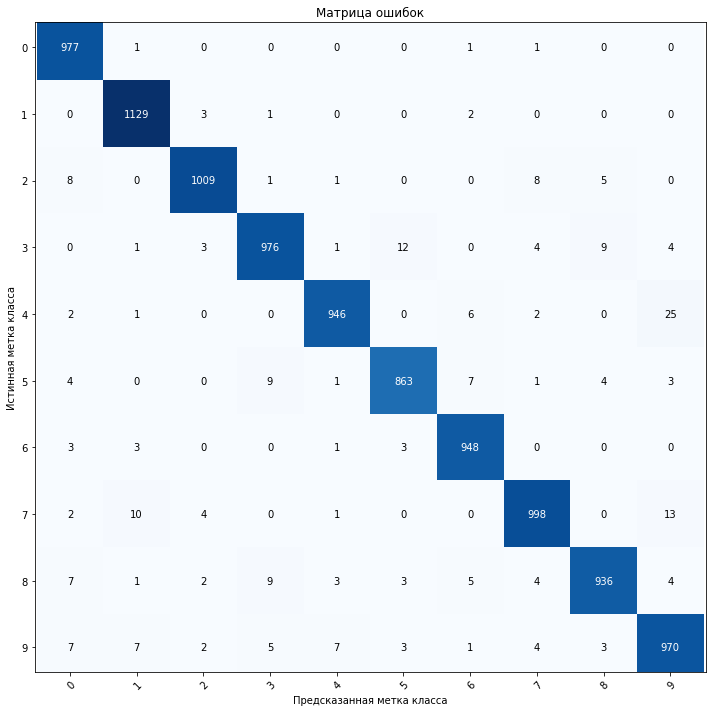

In [111]:
cm = plot_confusion_matrix(y_test, result, np.arange(0, 11))


In [117]:
kk = (result == y_test)

In [118]:
for i, x in enumerate(kk):
    if not x:
        if y_test[i] == 4 and result[i] == 9:
            print(i)

115
447
707
740
881
1178
1242
1422
1778
1865
2130
2447
2771
2901
3405
3490
4017
4194
4860
4911
5936
8061
8520
8527
9211


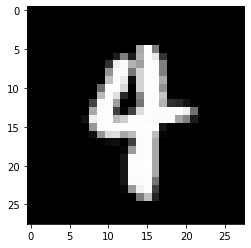

In [137]:
pixels = X_test.iloc[707].values.reshape((28, 28))
plt.imshow(pixels, cmap='gray')
plt.savefig(fname='4_1.pdf', format='pdf')
plt.show()


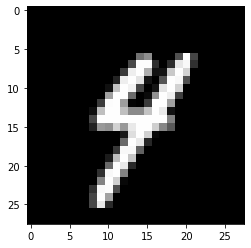

In [138]:
pixels = X_test.iloc[9211].values.reshape((28, 28))
plt.imshow(pixels, cmap='gray')
plt.savefig(fname='4_2.pdf', format='pdf')
plt.show()


In [131]:
for i, x in enumerate(kk):
    if not x:
        if y_test[i] == 7 and result[i] == 9:
            print(i)

1522
1721
3333
4199
4578
4690
5600
5620
5655
5714
5835
5887
5906


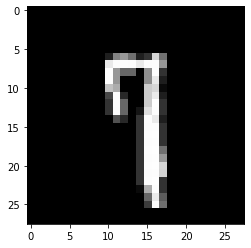

In [139]:
pixels = X_test.iloc[1522].values.reshape((28, 28))
plt.imshow(pixels, cmap='gray')
plt.savefig(fname='7_2.pdf', format='pdf')
plt.show()


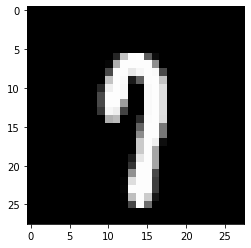

In [140]:
pixels = X_test.iloc[5600].values.reshape((28, 28))
plt.imshow(pixels, cmap='gray')
plt.savefig(fname='7_1.pdf', format='pdf')
plt.show()


In [141]:
for i, x in enumerate(kk):
    if not x:
        if y_test[i] == 3 and result[i] == 5:
            print(i)

938
957
1290
2408
2952
2953
4740
6011
6045
6059
8277
8290


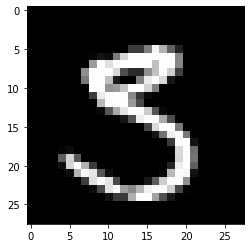

In [31]:
pixels = X_test.iloc[938].values.reshape((28, 28))
plt.imshow(pixels, cmap='gray')
plt.savefig(fname='3_1.pdf', format='pdf')
plt.show()


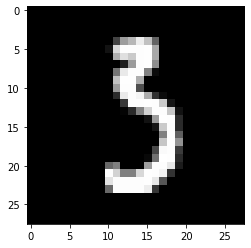

In [32]:
pixels = X_test.iloc[1290].values.reshape((28, 28))
plt.imshow(pixels, cmap='gray')
plt.savefig(fname='3_2.pdf', format='pdf')
plt.show()


### Augmentation

In [3]:
from skimage.transform import rotate
from skimage.filters import gaussian
from skimage.transform import AffineTransform, warp, SimilarityTransform

In [4]:
newpic = rotate(X_test.iloc[1290].values.reshape((28, 28)), 50.0)

C:\conda\lib\site-packages\skimage\util\dtype.py:135: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))


In [5]:
def shift(image, vector):
    transform = AffineTransform(translation=vector)
    shifted = warp(image, transform, mode='wrap', preserve_range=True)

    shifted = shifted.astype(image.dtype)

In [6]:
shift(newpic, [200.0, 0.0])

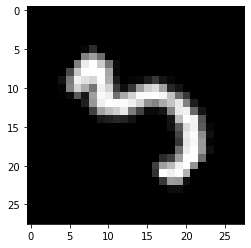

In [7]:
pixels = newpic
plt.imshow(pixels, cmap='gray')
plt.show()


In [8]:
gaus1 = gaussian(newpic, sigma=1.0)

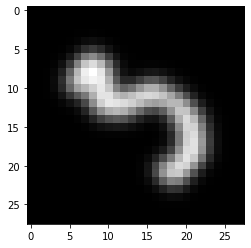

In [9]:
pixels = gaus1
plt.imshow(pixels, cmap='gray')
plt.show()


In [10]:
inverse_map = SimilarityTransform(translation=(-7, 0))
shifted = warp(newpic, inverse_map)

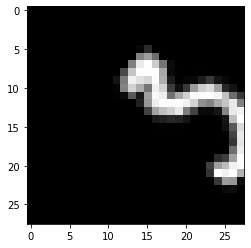

In [12]:
pixels = shifted
plt.imshow(pixels, cmap='gray')
plt.show()


In [124]:
list_rotates = [-15, -10, -5, 5, 10, 15]
list_shifts_x = [-3, -2, -1, 1, 2, 3]
list_shifts_y = [-3, -2, -1, 1, 2, 3]
list_sigmas = [0.5, 1, 1.5]

In [125]:
import itertools

In [126]:
i = 0
for element in itertools.product(list_rotates, list_shifts_x, list_shifts_y, list_sigmas):
    i += 1
print(i)

648


In [127]:
tranformations_num = len(list(itertools.product(list_rotates, list_shifts_x, list_shifts_y, list_sigmas)))

Поскольку для перебора всех варианты потребуется очень много ресурсов, используем рандомизированный подход. Будем добавлять в обучающую выборку картинки, преобразованные случайным (из 648 вариантов) образом, и считать качество на кросс-валидации. Всего переберем 50 вариантов.

In [184]:
rand_idx = np.random.randint(tranformations_num, size=10)

In [185]:
from sklearn.model_selection import cross_val_score

In [186]:
params = {
    'strategy' : 'brute',
    'metric' : 'cosine',
    'weights' : True,
    'test_block_size' : 10000
}

In [187]:
vec_rotate = np.vectorize(rotate, signature='(n,m)->(n,m)', excluded=['angle'])
vec_gauss = np.vectorize(gaussian, signature='(n,m)->(n,m)', excluded=['sigma'])
vec_shift = np.vectorize(warp, signature='(n,m)->(n,m)', excluded=['inverse_map'])

for i, element in enumerate(itertools.product(list_rotates, list_shifts_x, list_shifts_y, list_sigmas)):
    if i not in rand_idx:
        continue
    new_train = X_train[:10000].copy(deep=True)
    
    transformed_to_pic = np.apply_along_axis(np.reshape, 1, new_train, (28, 28))
    
    rotated = vec_rotate(transformed_to_pic, angle=element[0]).reshape((transformed_to_pic.shape[0], 784))
    blured = vec_gauss(transformed_to_pic, sigma=element[3]).reshape((transformed_to_pic.shape[0], 784))
    shifted = vec_shift(transformed_to_pic, inverse_map=SimilarityTransform(translation=(element[1], element[2]))).reshape((transformed_to_pic.shape[0], 784))
    
    Train_t = np.concatenate((new_train.values, rotated, blured, shifted), axis=0)
    Labels_t =  np.concatenate((y_train.values[:10000], y_train.values[:10000], y_train.values[:10000], y_train.values[:10000]), axis=0)
    
    shuffle = np.random.permutation(Train_t.shape[0])
    
    folds = kfold(Train_t.shape[0], 3)
    
    cv_results = knn_cross_val_score(Train_t[shuffle], Labels_t[shuffle], [4], 'accuracy', folds, **params)
    print(element)
    print(cv_results[4].mean())

C:\conda\lib\site-packages\skimage\util\dtype.py:135: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))


(-15, -1, -1, 1.5)
0.9681500548434925


C:\conda\lib\site-packages\skimage\util\dtype.py:135: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))


(-10, 3, -3, 1)
0.9755500223788691


C:\conda\lib\site-packages\skimage\util\dtype.py:135: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))


(-5, -2, 1, 0.5)
0.984274994921121


C:\conda\lib\site-packages\skimage\util\dtype.py:135: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))


(-5, 2, 1, 1)
0.9829749736635579


C:\conda\lib\site-packages\skimage\util\dtype.py:135: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))


(-5, 3, 1, 0.5)
0.9845750961776844


C:\conda\lib\site-packages\skimage\util\dtype.py:135: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))


(5, -3, -3, 0.5)
0.9841999649192458


C:\conda\lib\site-packages\skimage\util\dtype.py:135: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))


(5, 3, -2, 1.5)
0.9747748923684929


C:\conda\lib\site-packages\skimage\util\dtype.py:135: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))


(5, 3, 3, 0.5)
0.9843000499239963


C:\conda\lib\site-packages\skimage\util\dtype.py:135: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))


(15, -2, -2, 1)
0.9708249848533675


C:\conda\lib\site-packages\skimage\util\dtype.py:135: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))


(15, -2, 1, 0.5)
0.9744250561249315


In [276]:
element = (-5, 3, 1, 0.5)

In [292]:
clf = KNNClassifier(4, **params)

In [293]:
transformed_to_pic = np.apply_along_axis(np.reshape, 1, X_train, (28, 28))

In [294]:
rotated = vec_rotate(transformed_to_pic, angle=element[0]).reshape((transformed_to_pic.shape[0], 784))
blured = vec_gauss(transformed_to_pic, sigma=element[3]).reshape((transformed_to_pic.shape[0], 784))
shifted = vec_shift(transformed_to_pic, inverse_map=SimilarityTransform(translation=(element[1], element[2]))).reshape((transformed_to_pic.shape[0], 784))

Train_t = np.concatenate((X_train.values, rotated, blured, shifted), axis=0)
Labels_t =  np.concatenate((y_train.values, y_train.values, y_train.values, y_train.values), axis=0)

C:\conda\lib\site-packages\skimage\util\dtype.py:135: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))


In [295]:
clf.fit(Train_t, Labels_t)

In [296]:
%%time
result = clf.predict(X_test)

Wall time: 2min 2s


In [297]:
Train_t.shape

(240000, 784)

In [298]:
Labels_t.shape

(240000,)

In [299]:
result.shape

(10000,)

In [300]:
(result == y_test).sum() / y_test.shape[0]

0.9771

Матрица ошибок


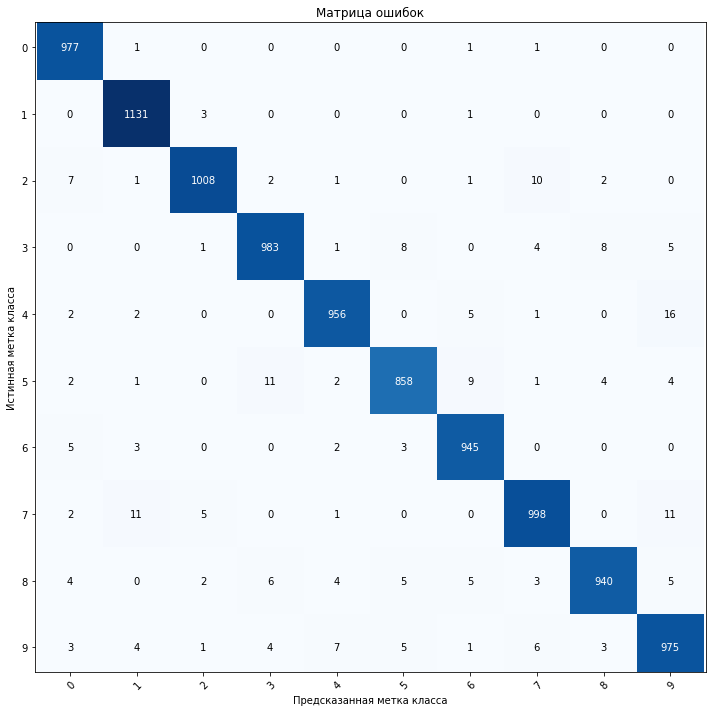

In [302]:
cm = plot_confusion_matrix(y_test, result, np.arange(0, 11))


### Another way

In [211]:
params = {
    'strategy' : 'brute',
    'metric' : 'cosine',
    'weights' : True,
    'test_block_size' : 10000
}

In [228]:
def _most_frequent_value(x):
    (values,counts) = np.unique(x, return_counts=True, axis=0)
    ind = np.argmax(counts)
    return values[ind]

In [258]:
vec_rotate = np.vectorize(rotate, signature='(n,m)->(n,m)', excluded=['angle'])
vec_gauss = np.vectorize(gaussian, signature='(n,m)->(n,m)', excluded=['sigma'])
vec_shift = np.vectorize(warp, signature='(n,m)->(n,m)', excluded=['inverse_map'])

for i, element in enumerate(itertools.product(list_rotates, list_shifts_x, list_shifts_y, list_sigmas)):
    if i not in rand_idx:
        continue
    new_train = X_train.values[:10000]
    y_new = y_train.values[:10000]
    
    transformed_to_pic = np.apply_along_axis(np.reshape, 1, X_test, (28, 28))
    
    rotated = vec_rotate(transformed_to_pic, angle=element[0]).reshape((transformed_to_pic.shape[0], 784))
    blured = vec_gauss(transformed_to_pic, sigma=element[3]).reshape((transformed_to_pic.shape[0], 784))
    shifted = vec_shift(transformed_to_pic, inverse_map=SimilarityTransform(translation=(element[1], element[2]))).reshape((transformed_to_pic.shape[0], 784))
    
    clf = KNNClassifier(4, **params)
    clf.fit(new_train, y_new)
    dist1, idx1 = clf.find_kneighbors(X_test, True)
    dist2, idx2 = clf.find_kneighbors(rotated, True)
    dist3, idx3 = clf.find_kneighbors(blured, True)
    dist4, idx4 = clf.find_kneighbors(shifted, True)
    
    full_dist = np.concatenate((dist1, dist2, dist3, dist4), axis=1)
    sort_dist = np.argsort(full_dist, axis=1)
    k_first = sort_dist
    indexes = np.concatenate((idx1, idx2, idx3, idx4), axis=1)
    
    result = np.apply_along_axis(_most_frequent_value, 1, y_new[indexes[np.arange(indexes.shape[0])[:, None], k_first][:, :4]])
    print(element)
    print((result == y_test).sum() / y_test.shape[0])
    

C:\conda\lib\site-packages\skimage\util\dtype.py:135: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))


(-15, -1, -1, 1.5)
0.9044


C:\conda\lib\site-packages\skimage\util\dtype.py:135: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))


(-10, 3, -3, 1)
0.9431


C:\conda\lib\site-packages\skimage\util\dtype.py:135: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))


(-5, -2, 1, 0.5)
0.9569


C:\conda\lib\site-packages\skimage\util\dtype.py:135: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))


(-5, 2, 1, 1)
0.9418


C:\conda\lib\site-packages\skimage\util\dtype.py:135: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))


(-5, 3, 1, 0.5)
0.9564


C:\conda\lib\site-packages\skimage\util\dtype.py:135: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))


(5, -3, -3, 0.5)
0.9557


C:\conda\lib\site-packages\skimage\util\dtype.py:135: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))


(5, 3, -2, 1.5)
0.9069


C:\conda\lib\site-packages\skimage\util\dtype.py:135: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))


(5, 3, 3, 0.5)
0.9557


C:\conda\lib\site-packages\skimage\util\dtype.py:135: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))


(15, -2, -2, 1)
0.9406


C:\conda\lib\site-packages\skimage\util\dtype.py:135: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))


(15, -2, 1, 0.5)
0.9569


In [216]:
mat1 = np.array([[20, 10], [30, 40]])
mat2 = np.array([[100, 200], [300, 400]])

In [217]:
np.argsort(np.concatenate((mat1, mat2), axis=1))

array([[1, 0, 2, 3],
       [0, 1, 2, 3]], dtype=int64)

In [236]:
indexes

array([[9724, 6525,  522, ...,  562, 4545, 3250],
       [1609, 5438, 1874, ..., 3200, 4182,  646],
       [5732, 2301, 6380, ..., 7579, 1148, 3728],
       ...,
       [3261, 9362, 8220, ..., 4959, 6969, 5807],
       [1311, 6011, 5991, ...,  499, 7681, 1207],
       [5179, 5329, 7641, ..., 5629, 5973, 7641]], dtype=int64)

In [251]:
k_first.shape

(10000, 16)

In [247]:
indexes[k_first].shape

(10000, 16, 16)

In [255]:
y_new[indexes[np.arange(indexes.shape[0])[:, None], k_first][:, :4]]

array([[7, 7, 7, 7],
       [2, 8, 2, 2],
       [1, 1, 1, 1],
       ...,
       [4, 4, 9, 4],
       [5, 5, 8, 5],
       [6, 6, 6, 6]], dtype=int64)

In [245]:
indexes.shape

(10000, 16)

In [231]:
np.apply_along_axis(_most_frequent_value, 1, result)

array([0, 9, 0, ..., 1, 0, 0], dtype=int64)

In [272]:
element = (15, -2, 1, 0.5)

In [273]:
vec_rotate = np.vectorize(rotate, signature='(n,m)->(n,m)', excluded=['angle'])
vec_gauss = np.vectorize(gaussian, signature='(n,m)->(n,m)', excluded=['sigma'])
vec_shift = np.vectorize(warp, signature='(n,m)->(n,m)', excluded=['inverse_map'])

new_train = X_train.values
y_new = y_train.values
    
transformed_to_pic = np.apply_along_axis(np.reshape, 1, X_test, (28, 28))

rotated = vec_rotate(transformed_to_pic, angle=element[0]).reshape((transformed_to_pic.shape[0], 784))
blured = vec_gauss(transformed_to_pic, sigma=element[3]).reshape((transformed_to_pic.shape[0], 784))
shifted = vec_shift(transformed_to_pic, inverse_map=SimilarityTransform(translation=(element[1], element[2]))).reshape((transformed_to_pic.shape[0], 784))

clf = KNNClassifier(4, **params)
clf.fit(new_train, y_new)
dist1, idx1 = clf.find_kneighbors(X_test, True)
dist2, idx2 = clf.find_kneighbors(rotated, True)
dist3, idx3 = clf.find_kneighbors(blured, True)
dist4, idx4 = clf.find_kneighbors(shifted, True)

full_dist = np.concatenate((dist1, dist2, dist3, dist4), axis=1)
sort_dist = np.argsort(full_dist, axis=1)
k_first = sort_dist
indexes = np.concatenate((idx1, idx2, idx3, idx4), axis=1)

result = np.apply_along_axis(_most_frequent_value, 1, y_new[indexes[np.arange(indexes.shape[0])[:, None], k_first][:, :4]])
print(element)
print((result == y_test).sum() / y_test.shape[0])
    

C:\conda\lib\site-packages\skimage\util\dtype.py:135: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))


(15, -2, 1, 0.5)
0.9757


1:05

Матрица ошибок


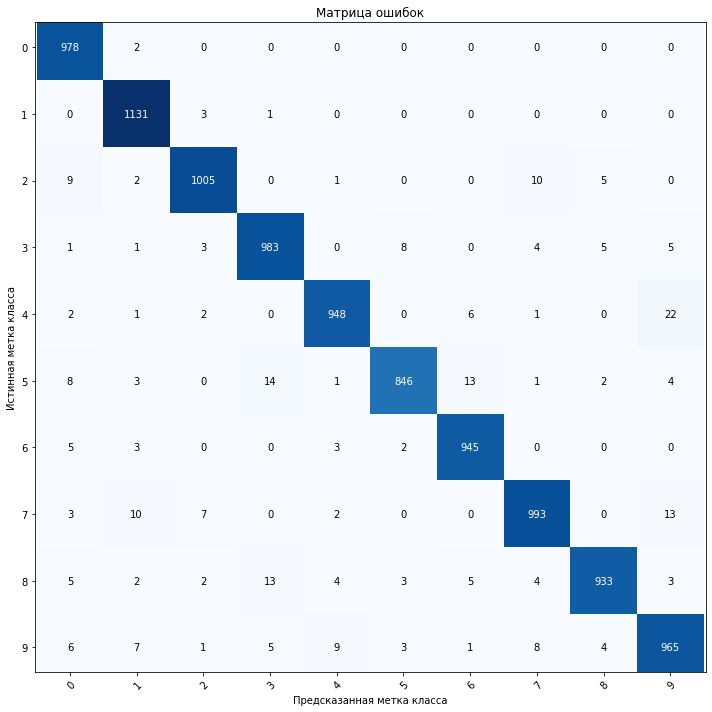

In [274]:
cm = plot_confusion_matrix(y_test, result, np.arange(0, 11))